# Background
On the threshold of the coronavirus disease 2019 (COVID-19) pandemic, some politicians insisted "the solution cannot be worse than the problem" and refused to introduce a lockdown to save people's lives. Now that 2020 has passed, we can compare the Gross Domestic Product (GDP) growth rate and excess death of 2020 between different countries.



## *Research questions*
- How is the lethality of COVID-19? We look into this question by checking the excess death of various countries, which is the number of actual deaths minus the expected deaths (the expected death is estimated based on historical averages). The number of excess deaths is often used to measure the severity of a large-scale issue such as the pandemic.
- Has the GDP decreased a lot in 2020 for different countries? We look into this issue by exploring the GDP growth rate difference between 2020 and 2019.
- Is it possible to keep the economy growth 'at the expense' of losing people? This question is answered by the relationship between the excess death and GDP growth rate.

## *Data*
The excess death [data](https://github.com/nytimes/covid-19-data/blob/master/excess-deaths/) is compiled by the New York Times. The GDP [data](https://www.imf.org/external/datamapper/NGDP_RPCH@WEO/OEMDC/ADVEC/WEOWORLD/) is from the website of the International Monetary Fund (IMF).

# Import packages and data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
FILE = "data/"

### Excess death of 2020
death = pd.read_csv(FILE + 'deaths.csv')

### GDP data of 2020
gdp = pd.read_csv(FILE + 'GDP.csv')

# Data Wrangling
## *EDA*

In [3]:
### peak the death data
death.head()

,country,placename,frequency,start_date,end_date,year,month,week,deaths,expected_deaths,excess_deaths,baseline
0,Austria,NaN,weekly,2020-01-06,2020-01-12,2020,1,2.0,1702,1806.0,-104.0,2015-2019 historical data
1,Austria,NaN,weekly,2020-01-13,2020-01-19,2020,1,3.0,1797,1819.0,-22.0,2015-2019 historical data
2,Austria,NaN,weekly,2020-01-20,2020-01-26,2020,1,4.0,1779,1831.0,-52.0,2015-2019 historical data
3,Austria,NaN,weekly,2020-01-27,2020-02-02,2020,2,5.0,1947,1837.0,110.0,2015-2019 historical data
4,Austria,NaN,weekly,2020-02-03,2020-02-09,2020,2,6.0,1681,1837.0,-156.0,2015-2019 historical data


In [4]:
### which years are included in the death data?
death.year.value_counts()

2020                 1268
2019                 1133
2018                 1113
2017                 1026
2016                  958
2015                  774
2015-2018 average     254
2012                  114
2013                  114
2014                  114
2010                  113
2011                  113
2015-2019 average      62
2018-2019 average      51
2017-2019 average      51
Name: year, dtype: int64

In [5]:
### we only need to keep year 2020 data. The rest rows are just for calculating the baseline
death_2020 = death[death.year == '2020']

In [6]:
### check missing values in death of year 2020
death_2020.isnull().sum()

country               0
placename          1187
frequency             0
start_date          109
end_date            109
year                  0
month                 0
week                109
deaths                0
expected_deaths       0
excess_deaths         0
baseline              0
dtype: int64

In [8]:
# check the missing data in GDP data
gdp.isnull().sum()

country    0
2019       0
2020       0
dtype: int64

## *New Features*

In [27]:
### Death Ratio: the ratio of excess death to expected death
death_area = death_2020[['country','expected_deaths', 'excess_deaths']].groupby('country').sum()
death_area['death_ratio'] = death_area['excess_deaths']/death_area['expected_deaths']

### GDP change: the 2020 GDP growth rate minus the 2019 one
gdp['gdp_change'] = gdp['2020'] - gdp['2019']

We are using death ratio because the time frames of data for different countries are different.

In [28]:
### Merge the death and GDP data
death_gdp = pd.merge(left=death_area, right=gdp, how='outer', left_on='country',right_on='country')

In [29]:
death_gdp.head()

,country,expected_deaths,excess_deaths,death_ratio,2019,2020,gdp.change,gdp_change
0,Austria,76621.0,6877.0,0.089753,1.6,-6.7,-8.3,-8.3
1,Belgium,95293.0,14281.0,0.149864,1.4,-8.3,-9.7,-9.7
2,Bolivia,49549.0,29469.0,0.594745,2.2,-7.9,-10.1,-10.1
3,Brazil,1067249.0,200843.0,0.188188,1.1,-5.8,-6.9,-6.9
4,Chile,108913.0,14253.0,0.130866,1.1,-6.0,-7.1,-7.1


# Question 1: Death

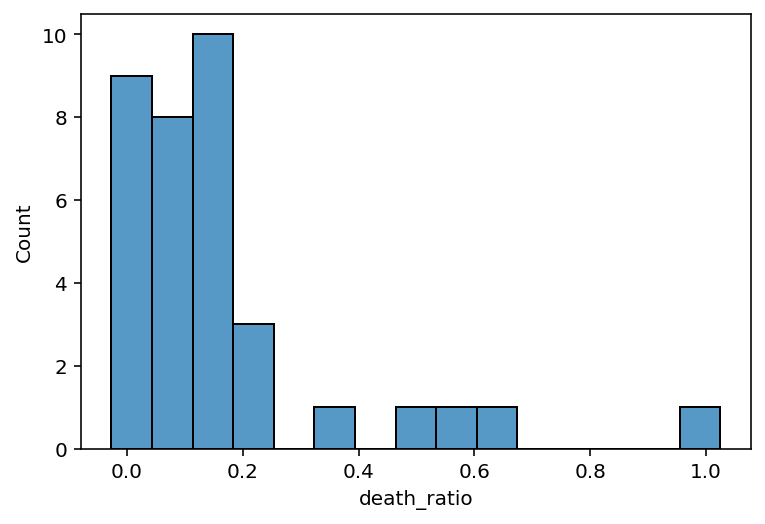

In [35]:
### create a histgram of death_ratio
sns.histplot(death_gdp, x="death_ratio")

Sort the DataFrame by death_ratio to see the worst performed countries:

In [37]:
death_gdp.sort_values(['death_ratio'], ascending = False)

,country,expected_deaths,excess_deaths,death_ratio,2019,2020,gdp.change,gdp_change
22,Peru,104493.0,107023.0,1.024212,2.2,-13.9,-16.1,-16.1
8,Ecuador,58906.0,37479.0,0.636251,0.1,-11.0,-11.1,-11.1
2,Bolivia,49549.0,29469.0,0.594745,2.2,-7.9,-10.1,-10.1
14,Indonesia,34949.0,17535.0,0.501731,5.0,-1.5,-6.5,-6.5
19,Mexico,627846.0,227295.0,0.362023,-0.3,-9.0,-8.7,-8.7
25,Russia,109305.0,23445.0,0.214492,1.3,-4.1,-5.4,-5.4
32,Turkey,73484.0,15405.0,0.209637,0.9,-5.0,-5.9,-5.9
3,Brazil,1067249.0,200843.0,0.188188,1.1,-5.8,-6.9,-6.9
28,Spain,385723.0,68362.0,0.177231,2.0,-12.8,-14.8,-14.8
5,Colombia,203063.0,33168.0,0.163338,3.3,-8.2,-11.5,-11.5


In a few countries, fewer people passed away in 2020 compared to 2019. However, most countries suffered from greater life loss.

# Question 2: Economy

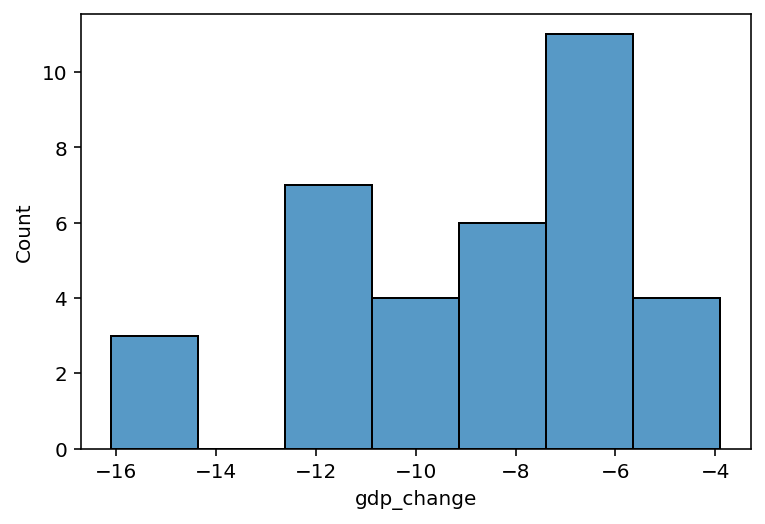

In [38]:
### create a histgram of gdp_change
sns.histplot(death_gdp, x="gdp_change")

In [40]:
death_gdp.sort_values(['gdp_change'], ascending = True)

,country,expected_deaths,excess_deaths,death_ratio,2019,2020,gdp.change,gdp_change
22,Peru,104493.0,107023.0,1.024212,2.2,-13.9,-16.1,-16.1
28,Spain,385723.0,68362.0,0.177231,2.0,-12.8,-14.8,-14.8
13,India,52062.0,8338.0,0.160155,4.2,-10.3,-14.5,-14.5
24,Portugal,104764.0,8731.0,0.083340,2.2,-10.0,-12.2,-12.2
5,Colombia,203063.0,33168.0,0.163338,3.3,-8.2,-11.5,-11.5
33,United Kingdom,583691.0,74615.0,0.127833,1.5,-9.8,-11.3,-11.3
10,France,559786.0,45917.0,0.082026,1.5,-9.8,-11.3,-11.3
8,Ecuador,58906.0,37479.0,0.636251,0.1,-11.0,-11.1,-11.1
12,Hungary,115559.0,4860.0,0.042056,4.9,-6.1,-11.0,-11.0
17,Italy,583873.0,80025.0,0.137059,0.3,-10.6,-10.9,-10.9


# Question 3: GDP and Deaths

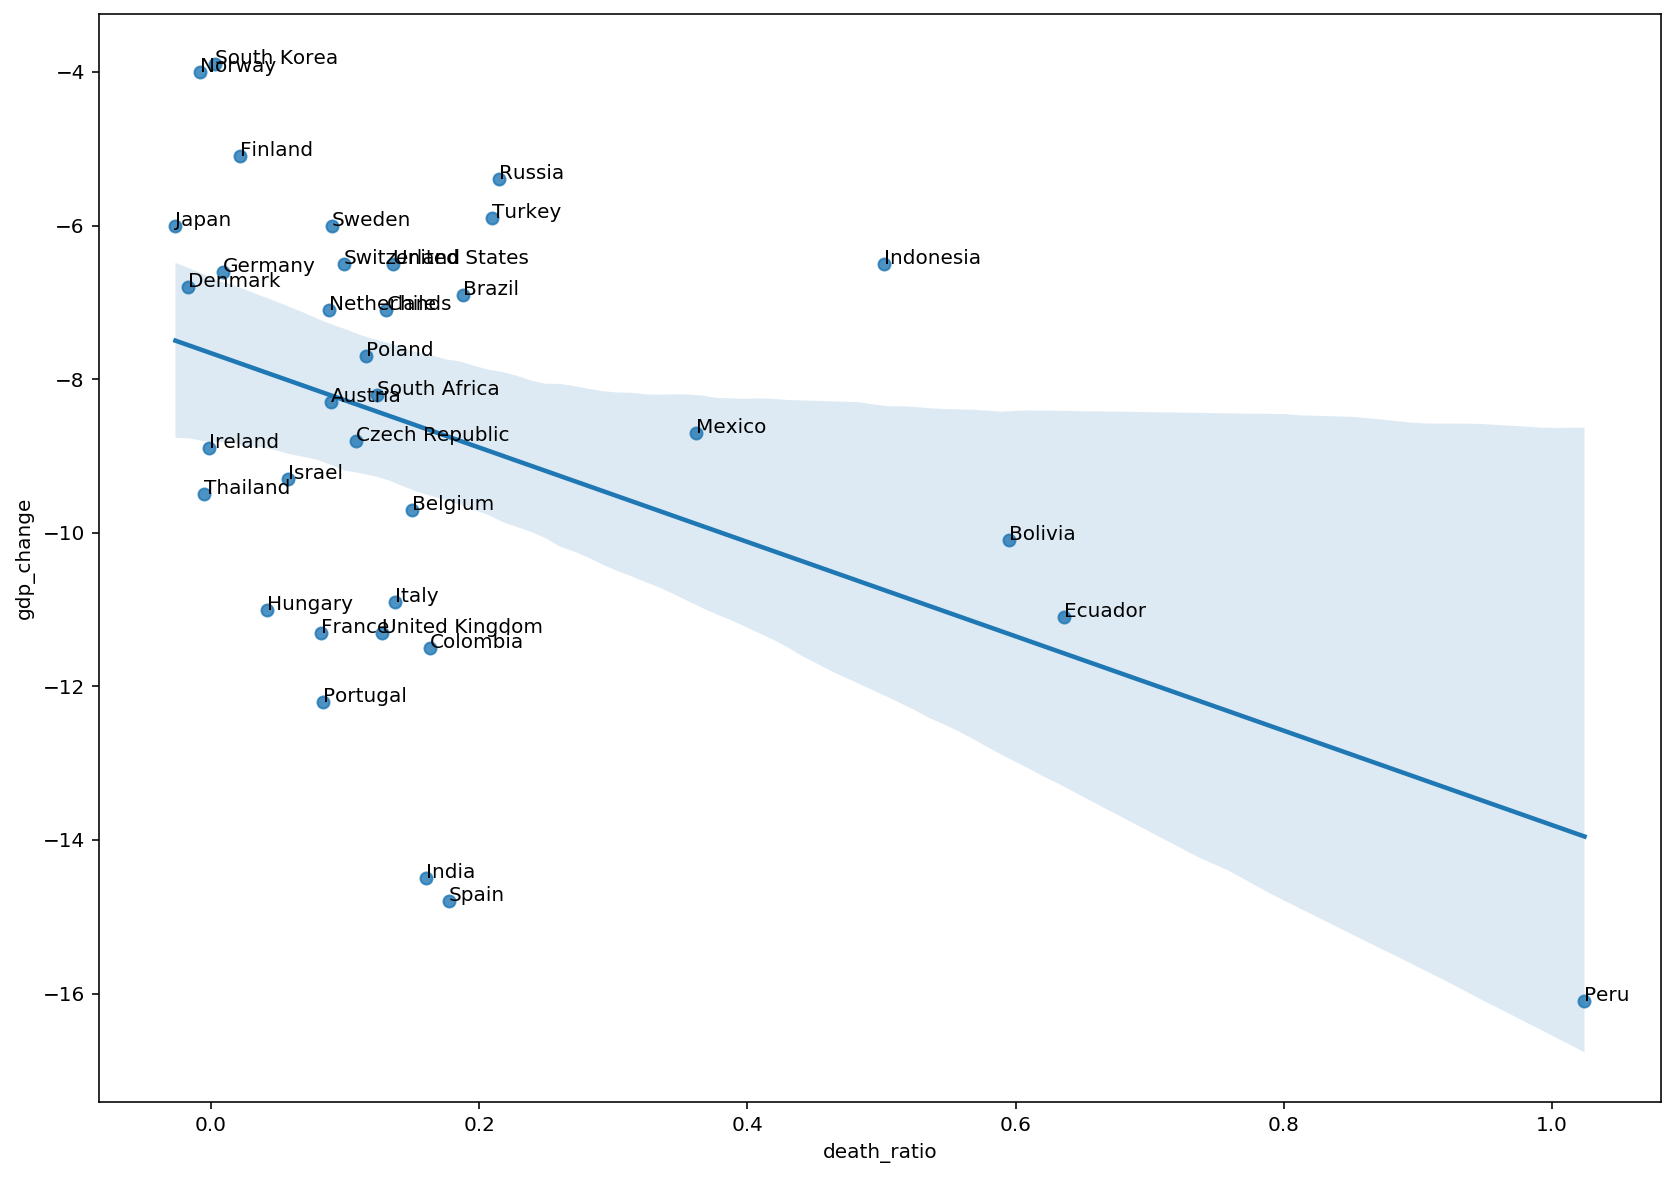

In [51]:
### set the figure size
plt.rcParams["figure.figsize"] = (14,10)

### create a scatter plot with a linear regression line
fig, ax = plt.subplots()
sns.regplot(data=death_gdp,x='death_ratio',y='gdp_change')

### add labels (countries)
for i, txt in enumerate(death_gdp['country']):
    ax.annotate(txt, (death_gdp['death_ratio'][i], death_gdp['gdp_change'][i]))


We would like to perform a test on the  Pearson's r between death_ratio and gdp_change to see if the difference is statistically significant.

In [57]:
from scipy.stats import pearsonr
results = pearsonr(death_gdp['death_ratio'],death_gdp['gdp_change'])

In [63]:
print('The Pearson\'s r is {:2f}, with a one-side p-value of {:2f}'.format(results[0],results[1]/2))

The Pearson's r is -0.447130, with a one-side p-value of 0.003541


The null hypothesis is the Pearson's r >= 0. The one-side p-value is much smaller than 0.05. We reject the null hypothesis and conlude the correlation between death_ratio and gdp_change is negative.